# Import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import time

# Load Data

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [ ]:
train_df= pd.read_csv('titanic/train.csv')
test_df=pd.read_csv('titanic/test.csv')

# Data Pre-Processing

## 1.Data Explore

In [ ]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [ ]:
train_df['Survived'].loc[train_df['Age'].isna()].value_counts()

0    125
1     52
Name: Survived, dtype: int64

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 2.Data Cleaning
### Combine train and test

In [ ]:
#combine train and test
df= train_df.append(test_df)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Columns "Ticket Number" is just ticket numbers which are not either Categoric data and Quantitative data
#### Columns "Cabin" has too many missing value
#### So we drop these 2 columns

In [ ]:
df=df.drop(['Cabin','Ticket'], axis=1) # drop useless attributes

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Fare         1308 non-null   float64
 9   Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 112.5+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


## 3.Identification and treatment of missing values and outliers.

#### As we some missing value in 'Age' 'Fare' 'Embarked', we could fill missing value with their mean value

In [ ]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

#### For Emabarked, I fill the most common one, which here is 'S'

In [ ]:
df=df.fillna(value = {'Age':df['Age'].mean(),'Fare':df['Fare'].mean(),'Embarked':'S'})

In [ ]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

   #### no missing data among features

## 4.Features Engineering


#### Name feature engineering

In [ ]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.') #extracting title from name

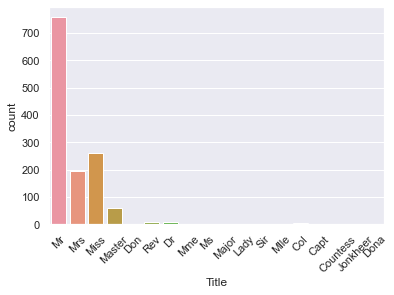

In [ ]:
g = sns.countplot(x="Title",data=df)
g = plt.setp(g.get_xticklabels(), rotation=45)

In [ ]:
df['Title'].replace({'Mlle': 'Miss', 'Mme': 'Mrs', 'Ms': 'Miss'}, inplace = True)
df['Title'].replace(['Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir','Countess','Col', 'Capt', 
                     'the Countess', 'Jonkheer', 'Dona'], 'Other', inplace = True)

In [ ]:
df['Title'].value_counts()

Mr        757
Miss      264
Mrs       198
Master     61
Other      29
Name: Title, dtype: int64

In [ ]:
title_list={'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Other':4}
df['Title'].replace(title_list,inplace=True)
df['Title'].value_counts()

0    757
1    264
2    198
3     61
4     29
Name: Title, dtype: int64

In [ ]:

categorical_vars = ['Sex','Embarked','Pclass','Title'] 



#### catogorical features engineering

In [ ]:
for item in categorical_vars:
    print(df[item].value_counts())
    print()

male      843
female    466
Name: Sex, dtype: int64

S    916
C    270
Q    123
Name: Embarked, dtype: int64

3    709
1    323
2    277
Name: Pclass, dtype: int64

0    757
1    264
2    198
3     61
4     29
Name: Title, dtype: int64



In [ ]:
#convert categorical data to ordinal_vars for linear regression use
df['Sex'] = df['Sex'].map(lambda x:1 if x == 'female' else 0)
df['Embarked'] = df['Embarked'].map(lambda x:0 if x =='S' else(1 if x=='C' else 2))

#### SibSp and Parch features engineering
Passenger who has  SlibSp & Parch means they were not traveling alone and has family. 
We need to combine SibSp and Parch to calculate family members by creating a new colums : Family=  SibSp+Parch


In [ ]:
df['Family']=(df["SibSp"]+df["Parch"])
df['Family'].describe()


count    1309.000000
mean        0.883881
std         1.583639
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        10.000000
Name: Family, dtype: float64

In [ ]:
consecutive_vars=['SibSp','Parch','Family','Age','Fare']

In [ ]:
#check consecutive_vars data
df[consecutive_vars].describe()

,SibSp,Parch,Family,Age,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.498854,0.385027,0.883881,29.881138,33.295479
std,1.041658,0.865560,1.583639,12.883193,51.738879
min,0.000000,0.000000,0.000000,0.170000,0.000000
25%,0.000000,0.000000,0.000000,22.000000,7.895800
50%,0.000000,0.000000,0.000000,29.881138,14.454200
75%,1.000000,0.000000,1.000000,35.000000,31.275000
max,8.000000,9.000000,10.000000,80.000000,512.329200


#### Age feature engineering
According to international age classification, We can set Age into age range groups:
0-Infancy:(0-1 years),
1-Youth:(2-14 years),
2-Young Adulthood (15-24 years),
3-Middle Adulthood (25-44 years),
4-Older Adulthood (45-64 years),
5-Seniors(65 and above),

In [2]:
#Age group classification:
def age_group(i):
    if i>=65:
        return 5
    elif i>=45:
        return 4
    elif i>=25:
        return 3
    elif i>=15:
        return 2
    elif i>=2:
        return 1
    else:return 0
df['Age'] =df['Age'].map(age_group)

NameError: ignored

In [3]:
df['Age'].value_counts()

NameError: ignored

#### Fare feature engineering
We can set Fare to 4 farerange groups:
0-Cheap:(0-10),
1-Medium:(10-50),
2-Medium expensive (50-100),
3-Expensive (>= 100),


In [ ]:
#Fare group classification:
def fare_group(i):
    if i>=100:
        return 3
    elif i>=50:
        return 2
    elif i>=10:
        return 1
    else:return 0
df['Fare'] =df['Fare'].map(fare_group)

NameError: ignored

In [ ]:
df['Fare'].value_counts()

In [ ]:
df.head()

#### Drop Name

In [ ]:
df=df.drop(columns=['Name'])


## Exploratory data analysis

### explore features impact on survive rate

C:\Dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Dev\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


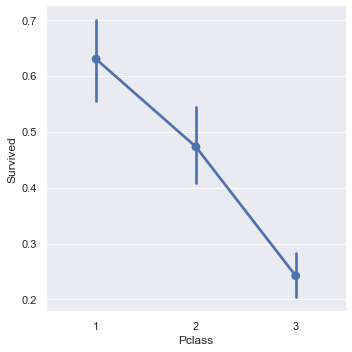

<Figure size 360x360 with 0 Axes>

C:\Dev\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


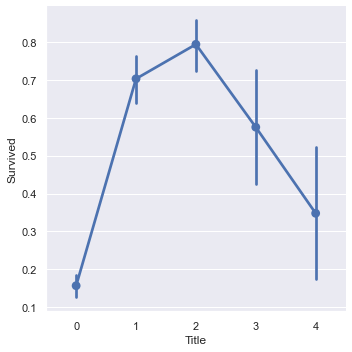

<Figure size 360x360 with 0 Axes>

C:\Dev\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


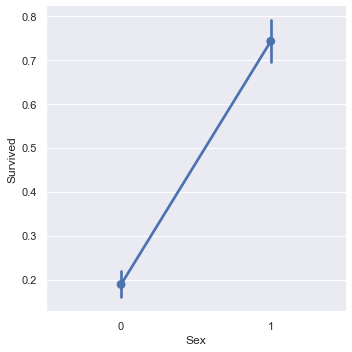

<Figure size 360x360 with 0 Axes>

C:\Dev\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


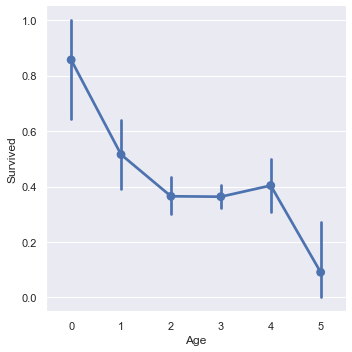

<Figure size 360x360 with 0 Axes>

C:\Dev\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


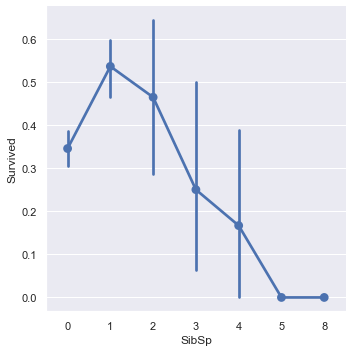

<Figure size 360x360 with 0 Axes>

C:\Dev\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


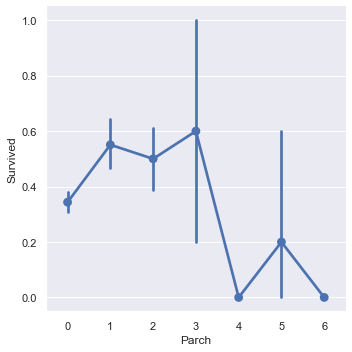

<Figure size 360x360 with 0 Axes>

C:\Dev\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


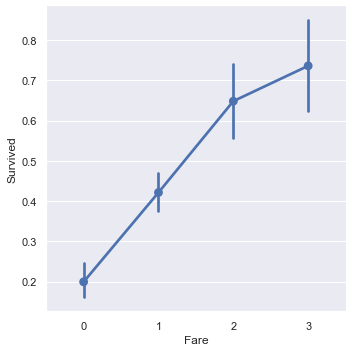

<Figure size 360x360 with 0 Axes>

C:\Dev\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


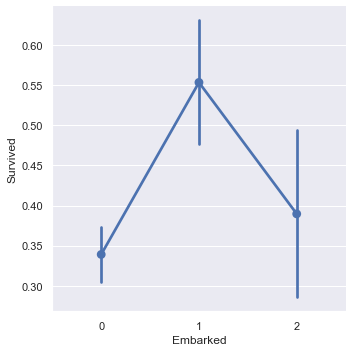

<Figure size 360x360 with 0 Axes>

C:\Dev\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


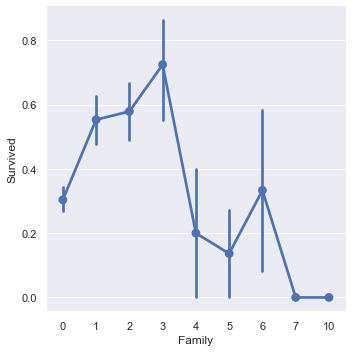

<Figure size 360x360 with 0 Axes>

In [ ]:
train = df[:891]
train['Survived']=train['Survived'].map(int)
features=['Pclass','Title','Sex','Age','SibSp','Parch','Fare','Embarked','Family']
for feature in features:
    sns.factorplot(feature,'Survived',data=train)

    plt.figure(figsize=(5,5))
    plt.show()

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,1,0,3,0,2,1,0,0,0,0,1
1,2,1,1,1,3,1,0,2,1,2,1
2,3,1,3,1,3,0,0,0,0,1,0
3,4,1,1,1,3,1,0,2,0,2,1
4,5,0,3,0,3,0,0,0,0,0,0


### explore correlations

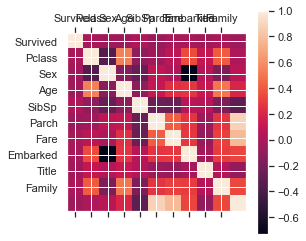

<Figure size 1080x1080 with 0 Axes>

In [ ]:
from numpy import corrcoef, sum, log, arange
from numpy.random import rand
from pylab import pcolor, show, colorbar, xticks, yticks
train_cor = train.drop(columns=['PassengerId'])
plt.matshow(train.corr())
plt.xticks(range(len(train_cor.columns)), train_cor.columns)
plt.yticks(range(len(train_cor.columns)), train_cor.columns)
plt.colorbar()
plt.figure(figsize=(15,15))
plt.show()

#### Double check train data

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,2.726150,0.523008,0.381594,0.863075,0.361392,0.728395,0.904602
std,257.353842,0.486592,0.836071,0.477990,0.863219,1.102743,0.806057,0.847531,0.635673,1.030039,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,5.000000,8.000000,6.000000,3.000000,2.000000,4.000000,10.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Sex          891 non-null    int64
 4   Age          891 non-null    int64
 5   SibSp        891 non-null    int64
 6   Parch        891 non-null    int64
 7   Fare         891 non-null    int64
 8   Embarked     891 non-null    int64
 9   Title        891 non-null    int64
 10  Family       891 non-null    int64
dtypes: int64(11)
memory usage: 123.5 KB


## Partition data into train, validation and test sets.

In [ ]:
#Split train and test 
train = df[:891]
test= df[891:]
X_train=train.drop(columns=['Survived','PassengerId']).values
y_train=train['Survived'].values.astype('int')
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,1,0.0,3,0,2,1,0,0,0,0,1
1,2,1.0,1,1,3,1,0,2,1,2,1
2,3,1.0,3,1,3,0,0,0,0,1,0
3,4,1.0,1,1,3,1,0,2,0,2,1
4,5,0.0,3,0,3,0,0,0,0,0,0


In [ ]:
test.head() 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,892,NaN,3,0,3,0,0,0,2,0,0
1,893,NaN,3,1,4,1,0,0,0,2,1
2,894,NaN,2,0,4,0,0,0,2,0,0
3,895,NaN,3,0,3,0,0,0,0,0,0
4,896,NaN,3,1,2,1,1,1,0,2,2


In [ ]:
# As we can not valid with test here, we use train to test the model
X_test=X_train
y_test=y_train

# Train different models on the training set  and select the best based on validation set performance.

### 1.linear Regression

In [ ]:
#Basic Regressions
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
X_scaled = preprocessing.scale(X_train)
reg = LinearRegression()
time_start_1 = time.time()
reg.fit(X_scaled,y_train)
y_pred = reg.predict(X_scaled)
timespend= time.time()- time_start_1

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [ ]:
#we notice that y_predict is not either 0 or 1, so we need a function to adjust our result
y_pred_adjust = pd.DataFrame(y_pred)[0].map(lambda x: 1 if x >= 0.5 else 0)
y_pred_adjust

0      0
1      1
2      1
3      1
4      0
      ..
886    1
887    1
888    0
889    0
890    0
Name: 0, Length: 891, dtype: int64

In [ ]:
score=accuracy_score(y_test,y_pred_adjust)
auc_sc=roc_auc_score(y_test, y_pred_adjust)
recall = recall_score(y_test, y_pred_adjust)
f1=f1_score(y_test,y_pred_adjust)
print("Linear Regression took %f seconds, accuracy = %f , Recall_score=%f, F1_score=%f, AUC_score=%f" % (timespend,score,recall,f1,auc_sc))


Linear Regression took 0.000997 seconds, accuracy = 0.811448 , Recall_score=0.736842, F1_score=0.750000, AUC_score=0.797383


#### Output our result to csv

In [ ]:
X_test=test.drop(columns=['Survived','PassengerId']).values
X_test = scaler.transform(X_test)
y_pred=reg.predict(X_test)
y_pred_adjust = pd.DataFrame(y_pred)[0].map(lambda x: 1 if x >= 0.5 else 0)
df_survived_output=pd.DataFrame(y_pred_adjust)
df_survived_output = df_survived_output.rename(columns={0:'Survived'})
df_submission=pd.concat([test['PassengerId'],df_survived_output['Survived']],axis=1)
classifiername= reg.__class__.__name__
filename = classifiername + '.csv'
df_submission.to_csv(filename,index=False)
df_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### 2. More Models

In [ ]:
ada_clf = AdaBoostClassifier(n_estimators=300, random_state=0)
etc_clf = ExtraTreesClassifier(n_estimators=300, random_state=0)
rfc_clf = RandomForestClassifier(n_estimators=300,max_depth=2, random_state=0)
gbc_clf = GradientBoostingClassifier(n_estimators=300,random_state=0)
knn_clf = KNeighborsClassifier(n_neighbors=10)
log_reg=LogisticRegression(random_state=0)
ensemble= VotingClassifier( estimators=[('ada', ada_clf), ('etc', etc_clf), ('rfc', rfc_clf),('gbc',gbc_clf),('knn',knn_clf),('log',log_reg)],voting='hard')

X_test=train.drop(columns=['Survived','PassengerId']).values

for clf in (ada_clf,knn_clf,etc_clf, rfc_clf,gbc_clf,log_reg,ensemble):
    time_start_1 = time.time()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    classifiername= clf.__class__.__name__
    timespend= time.time()- time_start_1
    score=accuracy_score(y_test,y_pred)
    auc_sc=roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1=f1_score(y_test,y_pred)
    print("%s took %f seconds, accuracy = %f , Recall_score=%f, F1_score=%f, AUC_score=%f" % (classifiername,timespend,score,recall,f1,auc_sc))


AdaBoostClassifier took 0.413883 seconds, accuracy = 0.827160 , Recall_score=0.766082, F1_score=0.772861, AUC_score=0.815646
KNeighborsClassifier took 0.026961 seconds, accuracy = 0.839506 , Recall_score=0.725146, F1_score=0.776213, AUC_score=0.817947
ExtraTreesClassifier took 0.336097 seconds, accuracy = 0.886644 , Recall_score=0.795322, F1_score=0.843411, AUC_score=0.869428
RandomForestClassifier took 0.334108 seconds, accuracy = 0.820426 , Recall_score=0.722222, F1_score=0.755352, AUC_score=0.801913
GradientBoostingClassifier took 0.214423 seconds, accuracy = 0.872054 , Recall_score=0.777778, F1_score=0.823529, AUC_score=0.854281
LogisticRegression took 0.006980 seconds, accuracy = 0.817059 , Recall_score=0.736842, F1_score=0.755622, AUC_score=0.801937
VotingClassifier took 1.388285 seconds, accuracy = 0.854097 , Recall_score=0.742690, F1_score=0.796238, AUC_score=0.833094


In [ ]:
etc_clf = ExtraTreesClassifier(n_estimators=300, random_state=0)
gbc_clf = GradientBoostingClassifier(n_estimators=300,random_state=0)
knn_clf = KNeighborsClassifier(n_neighbors=10)
ensemble= VotingClassifier( estimators=[('etc', etc_clf),('gbc',gbc_clf),('knn',knn_clf)],voting='hard')

X_test=train.drop(columns=['Survived','PassengerId']).values

for clf in (knn_clf,etc_clf,gbc_clf,ensemble):
    time_start_1 = time.time()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    classifiername= clf.__class__.__name__
    timespend= time.time()- time_start_1
    score=accuracy_score(y_test,y_pred)
    auc_sc=roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1=f1_score(y_test,y_pred)
    print("%s took %f seconds, accuracy = %f , Recall_score=%f, F1_score=%f, AUC_score=%f" % (classifiername,timespend,score,recall,f1,auc_sc))


KNeighborsClassifier took 0.031943 seconds, accuracy = 0.839506 , Recall_score=0.725146, F1_score=0.776213, AUC_score=0.817947
ExtraTreesClassifier took 0.336132 seconds, accuracy = 0.886644 , Recall_score=0.795322, F1_score=0.843411, AUC_score=0.869428
GradientBoostingClassifier took 0.212398 seconds, accuracy = 0.872054 , Recall_score=0.777778, F1_score=0.823529, AUC_score=0.854281
VotingClassifier took 0.581479 seconds, accuracy = 0.876543 , Recall_score=0.804094, F1_score=0.833333, AUC_score=0.862885


### Let us generate report from all these classifier to valid in kaggle

In [ ]:
X_test=test.drop(columns=['Survived','PassengerId']).values
for clf in (ada_clf,knn_clf,etc_clf, rfc_clf,gbr_clf,log_reg,ensemble):
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    df_survived_output=pd.DataFrame(y_pred)
    df_survived_output = df_survived_output.rename(columns={0:'Survived'})
    df_submission=pd.concat([test['PassengerId'],df_survived_output['Survived']],axis=1)
    classifiername= clf.__class__.__name__
    filename = classifiername + '.csv'
    df_submission.to_csv(filename,index=False)
    
    

## Result from Kaggle upload
### Accuracy score report for different models
#### High to low

Linear Regression : 0.77990

LogisticRegression 0.77511

GradientBoostingClassifier :0.76794

VotingClassifier 0.76555

ExtraTreesClassifier:0.75598

Random Forest Classifier:0.75119

Adabooster Classifier: 0.75358

K Neighbour Classifier:0.75598

GaussianNB: 0.73444

